## Header
This Script will perform preproccessing on a dataset of images.

In [76]:
#import general packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import os
import random

Next step is to find the paths of all imgages of the dataset.

Number of NOK images: 1860
Number of OK images: 1896


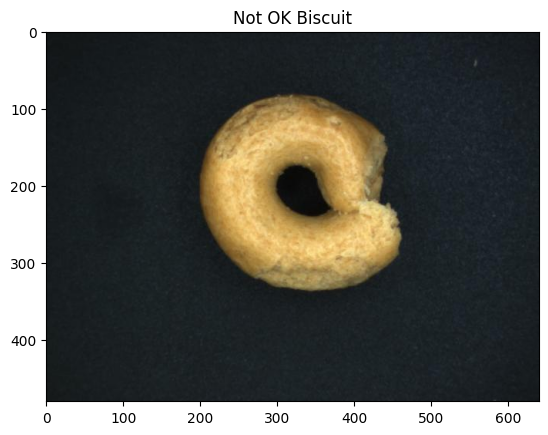

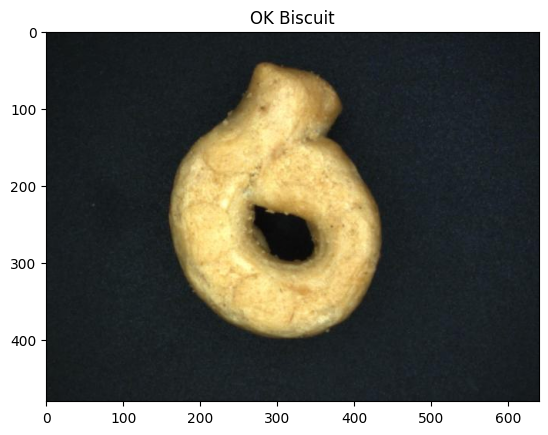

In [79]:
# define path of dataset
dir = r"C:\Users\marc\Documents\Biscuit Dataset - Team 4"

# create list of all image paths
NOK_image_paths = glob.glob(os.path.join(dir, "NOK", '*.jpg'),recursive=True)
OK_image_paths = glob.glob(os.path.join(dir, "OK", '*.jpg'),recursive=True)

# create list of all txt files which contain the bounding box coordinates
NOK_txt_paths = [NOK_image_paths[i].replace(".jpg",".txt") for i in range(len(NOK_image_paths))]
OK_txt_paths = [OK_image_paths[i].replace(".jpg",".txt") for i in range(len(OK_image_paths))]

# size of the dataset
print("Number of NOK images: {}".format(len(NOK_image_paths)))
print("Number of OK images: {}".format(len(OK_image_paths)))

# function to show an image
def show_image(image_path, title:str = ""):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.show()

# show an image from the NOK dataset
random_index = random.randint(0, len(NOK_image_paths))
image_path = NOK_image_paths[random_index]
show_image(image_path, title="Not OK Biscuit")

# show an image from the OK dataset
random_index = random.randint(0, len(OK_image_paths))
image_path = OK_image_paths[random_index]
show_image(image_path, title="OK Biscuit")


# Extract the bounding box coordinates from the txt files
In the next step, we will extract the bounding box coordinates from the txt files and apply the bounding box to the images.

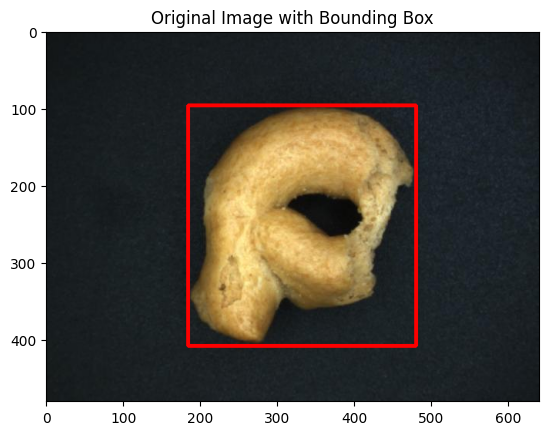

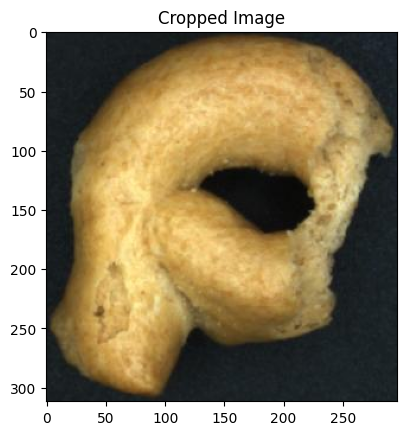

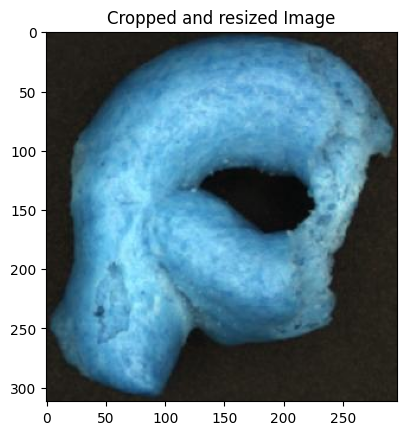

KeyboardInterrupt: 

In [ ]:
# create a list which contains all image paths
all_images_paths = NOK_image_paths + OK_image_paths
all_txt_paths = NOK_txt_paths + OK_txt_paths

# iterate over all image paths and apply the bounding box to the images
for idx,image_path in enumerate(all_images_paths):
    # extract the bounding box coordinates
    txt_file_path = all_txt_paths[idx]
    # check if the txt file matches the image path
    if txt_file_path!= image_path.replace(".jpg", ".txt"):
        print("The txt file path does not match the image path!")
        break
    
    # get the bounding box coordinates
    with open(txt_file_path) as f:
        lines = f.readlines()
        coordinates = lines[1].split(",")[2:]
        x_min = int(float(coordinates[0].split(" ")[1]))
        y_min = int(float(coordinates[1].split(" ")[1]))
        x_max = int(float(coordinates[4].split(" ")[1]))
        y_max = int(float(coordinates[5].split(" ")[1]))
        
    ## apply the bounding box to the image
    # read the image
    image = cv2.imread(image_path)
    # convert to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # crop the image
    cropped_image = image[y_min:y_max, x_min:x_max]
    # save the image
    cropped_image_path = image_path.replace("Biscuit Dataset - Team 4", "Biscuit Dataset - Team 4 - Cropped")
    if not os.path.exists(os.path.dirname(cropped_image_path)):
       os.makedirs(os.path.dirname(cropped_image_path))
    # add cropped to the image name
    cropped_image_path = cropped_image_path.replace(".jpg", "_cropped.jpg")
    # change color back to BGR
    cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR)
    # resize the image to a standard size
    cropped_and_resized_image = cv2.resize(cropped_image, (256, 256))
    # save the image
    cv2.imwrite(cropped_image_path, cropped_and_resized_image)
    
    ## Only for visualisation purposes
    if idx == 0:
        # add visualisation of the original image
        image = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255,0,0), 3)
        plt.imshow(image)
        plt.title("Original Image with Bounding Box")
        plt.show()
        
        # add visualisation of the cropped image
        cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
        plt.imshow(cropped_image)
        plt.title("Cropped Image")
        plt.show()
        
        # add visualisation of the cropped and resized image
        cropped_and_resized_image = cv2.cvtColor(cropped_and_resized_image, cv2.COLOR_BGR2RGB)
        plt.imshow(cropped_and_resized_image)
        plt.title("Cropped and resized Image")
        plt.show()
    

The next step is to convert all images to grayscale.

In [ ]:
# function to convert all images to grayscale
def to_grayscale(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

# put all images in one list
all_images = NOK_image_paths + OK_image_paths
all_images_grayscale = []

for image_path in all_images:
    grayscale_image_path = image_path.replace("Biscuit Dataset - Team 4", "Biscuit Dataset - Team 4 - Grayscale")
    if not os.path.exists(os.path.dirname(grayscale_image_path)):
        os.makedirs(os.path.dirname(grayscale_image_path))
    grayscale_image_path = grayscale_image_path.replace(".jpg", "_grayscale.jpg")
    image = to_grayscale(image_path)
    cv2.imwrite(grayscale_image_path, image)
    
    all_images_grayscale.append(grayscale_image_path)


plt.imshow(image,cmap='gray')
plt.title("Grayscale Image")
plt.show()
    

The next step is to threshold and filter the images.

In [ ]:
# function to perform thresholding and 2D-Filter on an image
def threshold_and_filter(image_path, threshold_value, kernel):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    thresholded = np.where(image < threshold_value, 0, image)
    # perform 2D-Filter
    gefiltertes_bild = cv2.filter2D(thresholded, -1, kernel)

    # set background to black
    background_black = np.where(thresholded == 0, 0, gefiltertes_bild)
    
    return background_black

# threshold_value for thresholding
threshold_value = 50
# Kernel for 2D-Filter
kernel = np.array([
    [1,  2,  1],
    [2,  4,  2],
    [1,  2,  1]
], dtype=np.float32)
kernel = kernel / np.sum(kernel)  #normalize kernel

# list for all thresholded images
all_images_grayscale_thresholded = []

# perform thresholding and 2D-Filter on all images
for image_path in all_images_grayscale:
    grayscale_threshold_image_path = image_path.replace("Biscuit Dataset - Team 4 - Grayscale", "Biscuit Dataset - Team 4 - Threshold")
    if not os.path.exists(os.path.dirname(grayscale_threshold_image_path)):
        os.makedirs(os.path.dirname(grayscale_threshold_image_path))
    grayscale_threshold_image_path = grayscale_threshold_image_path.replace(".jpg", "_threshold.jpg")
    image = threshold_and_filter(image_path,threshold_value=threshold_value,kernel=kernel)
    cv2.imwrite(grayscale_threshold_image_path, image)
    
    all_images_grayscale_thresholded.append(grayscale_threshold_image_path)
    
plt.imshow(image,cmap='gray')
plt.title("Thresholded and filtered image")
plt.show()

Next we want to detect the biscuit. For this we will use the contour method.

In [ ]:
# perform contour detection on all images
def detect_roi(image_path):
    # read image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # find contours
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # take the largest contour
    cnt = max(contours, key=cv2.contourArea)

    # caluclate the bounding rectangle
    x, y, w, h = cv2.boundingRect(cnt)

    # crop the image 
    image = image[y:y+h, x:x+w]

    return image

# list for all cropped images
all_images_grayscale_thresholded_cropped = []

# perform thresholding and 2D-Filter on all images
for image_path in all_images_grayscale_thresholded:
    grayscale_threshold_cropped_image_path = image_path.replace("Biscuit Dataset - Team 4 - Threshold", "Biscuit Dataset - Team 4 - Cropped")
    if not os.path.exists(os.path.dirname(grayscale_threshold_cropped_image_path)):
        os.makedirs(os.path.dirname(grayscale_threshold_cropped_image_path))
    grayscale_threshold_cropped_image_path = grayscale_threshold_cropped_image_path.replace(".jpg", "_threshold.jpg")
    image = detect_roi(image_path)
    cv2.imwrite(grayscale_threshold_cropped_image_path, image)
    
    all_images_grayscale_thresholded_cropped.append(grayscale_threshold_cropped_image_path)
    
plt.imshow(image,cmap='gray')
plt.title("Cropped image")
plt.show()

Lastly Resize all images to a standard size.

In [ ]:
def resize_image(image_path, width, height):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (width, height))
    return image

# list for all cropped images
all_images_final_paths = []

# perform thresholding and 2D-Filter on all images
for image_path in all_images_grayscale_thresholded_cropped:
    final_image_path = image_path.replace("Biscuit Dataset - Team 4 - Cropped", "Biscuit Dataset - Team 4 - FINAL")
    if not os.path.exists(os.path.dirname(final_image_path)):
        os.makedirs(os.path.dirname(final_image_path))
    final_image_number = os.path.basename(final_image_path).split("_")[0]
    finally_image_path = final_image_path.replace(final_image_number, final_image_number + "_FINAL.jpg")
    image = resize_image(image_path, width=300, height=300)
    cv2.imwrite(final_image_path, image)
    
    all_images_final_paths.append(final_image_path)
    
plt.imshow(image,cmap='gray')
plt.title("Final image")
plt.show()